In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import pylab

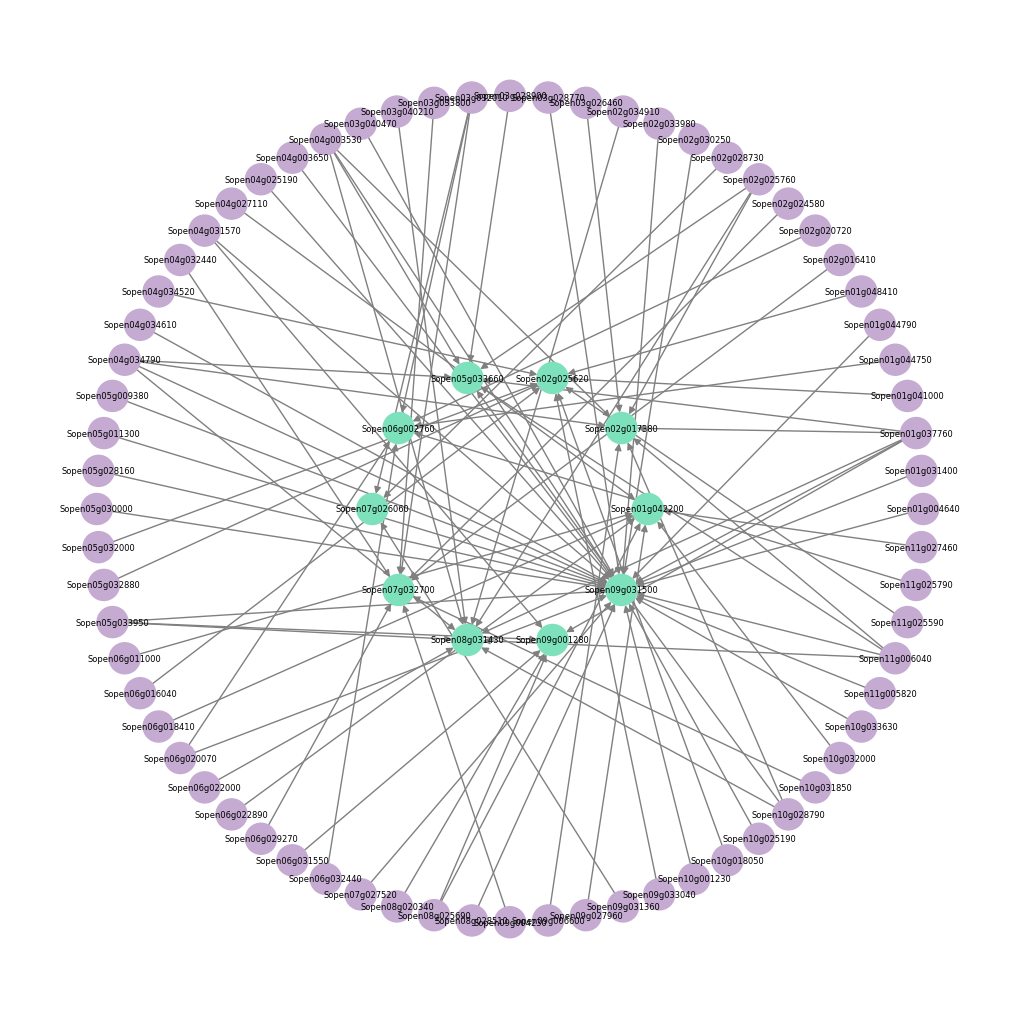

In [38]:
df = pd.read_csv('../output-files/aux-regulados-regulacion-fam.tsv', delimiter="\t", header=0, usecols=[0, 2, 5])

# Create directed graph
G = nx.from_pandas_edgelist(df, source="regulador", target="regulon", create_using=nx.DiGraph())

# Define regulated and regulator nodes
regulado_nodes = sorted(set(df['regulon']))  
regulador_nodes = sorted(set(df['regulador']))  
regulado_nodes
regulador_nodes
# Set circular positions for both groups
radius_inner = 0.5  # Radius for regulated nodes
radius_outer = 1.5  # Radius for regulator nodes

# Evenly space nodes using angles
theta_inner = np.linspace(0, 2 * np.pi, len(regulado_nodes), endpoint=False)
theta_outer = np.linspace(0, 2 * np.pi, len(regulador_nodes), endpoint=False)

# Assign positions
pos = {}

# Inner circle (regulated)
for i, node in enumerate(regulado_nodes):
    pos[node] = (radius_inner * np.cos(theta_inner[i]), radius_inner * np.sin(theta_inner[i]))

# Outer circle (regulators)
for i, node in enumerate(regulador_nodes):
    pos[node] = (radius_outer * np.cos(theta_outer[i]), radius_outer * np.sin(theta_outer[i]))

# Assign colors: green for regulated, purple for regulators
node_colors = ['#7de2bb' if node in regulado_nodes else '#c5abd2' for node in G.nodes()]

# Draw graph
plt.figure(figsize=(10, 10))  
nx.draw(G, pos, with_labels=True, node_size=500, node_color=node_colors, 
        edge_color='gray', font_size=6, arrows=True)

# Save the plot with a high DPI
plt.savefig('../output-images/aux-regulados-regulacion-pennelli.svg', dpi=300, bbox_inches='tight')
plt.savefig('../output-images/aux-regulados-regulacion-pennelli.png', dpi=300, bbox_inches='tight')
plt.show()


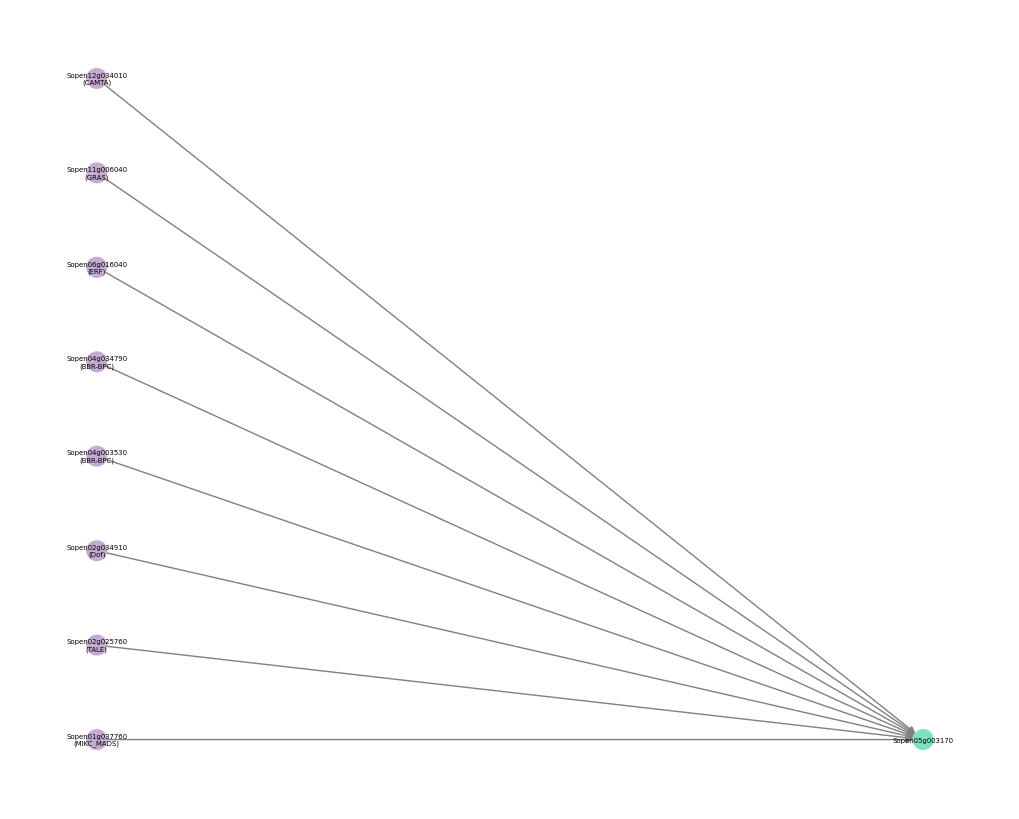

In [40]:
# Read the file with three columns
df = pd.read_csv('../output-files/bra-regulados-regulacion-fam.tsv', delimiter="\t", header=0, usecols=[0, 2, 5])
df = pd.read_csv('/media/cunzac/LaCie/katia/tarea1/salida-pennelli-brasino/bra-regulador-regulacion-fam.tsv', delimiter="\t", header=0, usecols=[0, 2, 5])
#df = pd.read_csv('/media/cunzac/LaCie/katia/tarea1/salida-pennelli-brasino/bra-regulados-regulacion-fam.tsv', delimiter="\t", header=0, usecols=[0, 2, 5])

# Create a directed graph
G = nx.from_pandas_edgelist(df, source="regulador", target="regulon", create_using=nx.DiGraph())

# Determine which nodes are "regulado" (in column 2)
regulado_nodes = set(df['regulon'])

# Define specific nodes to be colored differently
special_nodes = {"Sopen06g018310", "Sopen10g008890"}

# Assign colors using hex color codes
node_colors = []
for node in G.nodes():
    if node in special_nodes:
        node_colors.append('#a31e5d')  # Specific color for special nodes
    elif node in regulado_nodes:
        node_colors.append('#7de2bb')  # Color for regulado nodes
    else:
        node_colors.append('#c5abd2')  # Color for other nodes

# Identify source and target nodes
source_nodes = [node for node in G.nodes() if G.in_degree(node) == 0]  # Nodes with no incoming edges
target_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]  # Nodes with no outgoing edges

# Create a mapping from source nodes to their corresponding column 2 values
source_labels = {}
for _, row in df.iterrows():
    if row['regulador'] in source_nodes:
        source_labels[row['regulador']] = f"{row['regulador']}\n({row[df.columns[2]]})"  # Add column 2 value to label

# Assign positions to nodes
pos = {}

# Calculate y-coordinates for maximum separation
num_nodes = max(len(source_nodes), len(target_nodes))  # Use the larger of the two groups
y_coords = np.linspace(0, 10, num_nodes)  # Use a larger range (0 to 10) for maximum separation

# Place source nodes on the left
for i, node in enumerate(source_nodes):
    pos[node] = (0, y_coords[i])  # x = 0, y = maximally spaced

# Place target nodes on the right
for i, node in enumerate(target_nodes):
    pos[node] = (2, y_coords[i])  # x = 2, y = maximally spaced

# Place intermediate nodes in the middle
intermediate_nodes = set(G.nodes()) - set(source_nodes) - set(target_nodes)
for i, node in enumerate(intermediate_nodes):
    pos[node] = (1, y_coords[i])  # x = 1, y = maximally spaced

# Create labels for all nodes
labels = {}
for node in G.nodes():
    if node in source_labels:
        labels[node] = source_labels[node]  # Use custom label for source nodes
    else:
        labels[node] = str(node)  # Use default label for other nodes

# Draw the graph with customized node colors, positions, and labels
plt.figure(figsize=(10, 8))  # Set figure size (width, height) in inches
nx.draw(G, pos, with_labels=True, labels=labels, node_size=200, node_color=node_colors, edge_color='gray', font_size=5, arrows=True)

# Save the plot with a high DPI
plt.savefig('./output-images/bra-regulador-regulacion.png', dpi=300, bbox_inches='tight')

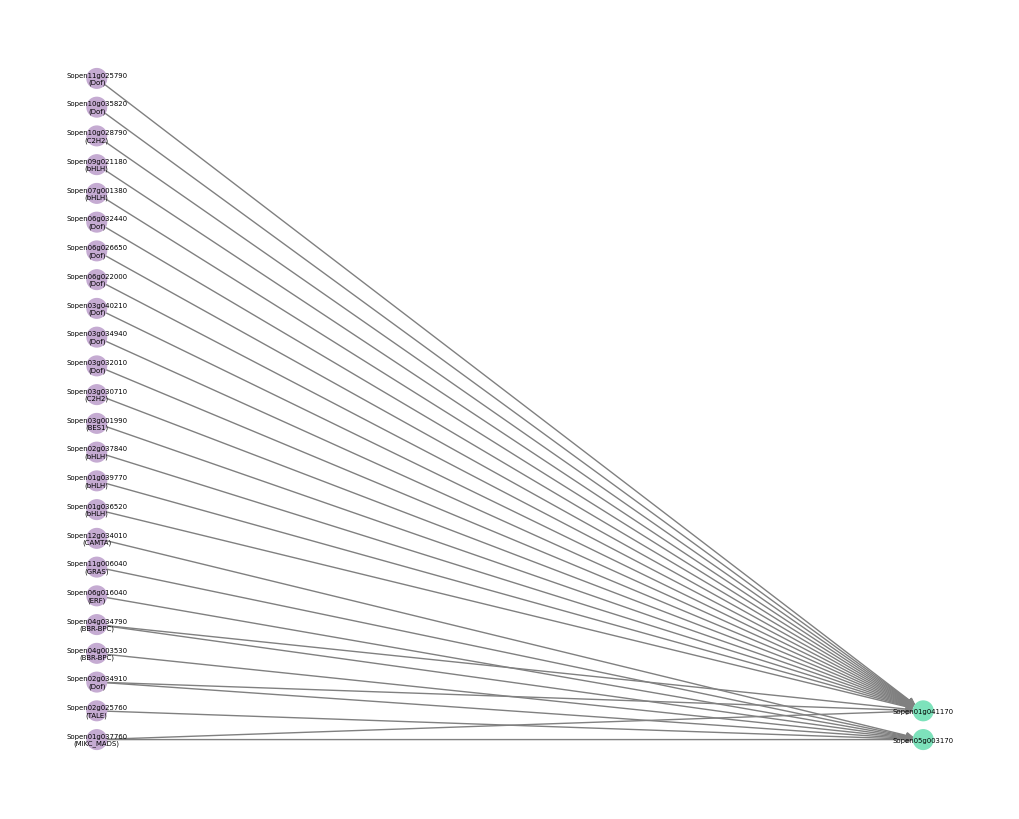

In [41]:
# Read the file with three columns
df = pd.read_csv('./output-files/MYC-regulados-regulacion-fam.tsv', delimiter="\t", header=0, usecols=[0, 2, 5])
df
# Create a directed graph
G = nx.from_pandas_edgelist(df, source="regulador", target="regulon", create_using=nx.DiGraph())

# Determine which nodes are "regulado" (in column 2)
regulado_nodes = set(df['regulon'])

# Define specific nodes to be colored differently
#special_nodes = {"Sopen02g038930", "Sopen10g030870"}
special_nodes = {"Sopen02g038930", "Sopen05g005260", "Sopen06g011000", "Sopen06g018310", "Sopen08g017970", "Sopen09g001040","Sopen09g027410",
                  "Sopen10g004890", "Sopen10g004900", "Sopen10g008890", "Sopen10g030870"}
# Assign colors using hex color codes
node_colors = []
for node in G.nodes():
    if node in special_nodes:
        node_colors.append('#a31e5d')  # Specific color for special nodes
    elif node in regulado_nodes:
        node_colors.append('#7de2bb')  # Color for regulado nodes
    else:
        node_colors.append('#c5abd2')  # Color for other nodes

# Identify source and target nodes
source_nodes = [node for node in G.nodes() if G.in_degree(node) == 0]  # Nodes with no incoming edges
target_nodes = [node for node in G.nodes() if G.out_degree(node) == 0]  # Nodes with no outgoing edges

# Create a mapping from source nodes to their corresponding column 2 values
source_labels = {}
for _, row in df.iterrows():
    if row['regulador'] in source_nodes:
        source_labels[row['regulador']] = f"{row['regulador']}\n({row[df.columns[2]]})"  # Add column 2 value to label

# Assign positions to nodes
pos = {}

# Calculate y-coordinates for maximum separation
num_nodes = max(len(source_nodes), len(target_nodes))  # Use the larger of the two groups
y_coords = np.linspace(0, 10, num_nodes)  # Use a larger range (0 to 10) for maximum separation

# Place source nodes on the left
for i, node in enumerate(source_nodes):
    pos[node] = (0, y_coords[i])  # x = 0, y = maximally spaced

# Place target nodes on the right
for i, node in enumerate(target_nodes):
    pos[node] = (2, y_coords[i])  # x = 2, y = maximally spaced

# Place intermediate nodes in the middle
intermediate_nodes = set(G.nodes()) - set(source_nodes) - set(target_nodes)
for i, node in enumerate(intermediate_nodes):
    pos[node] = (1, y_coords[i])  # x = 1, y = maximally spaced

# Create labels for all nodes
labels = {}
for node in G.nodes():
    if node in source_labels:
        labels[node] = source_labels[node]  # Use custom label for source nodes
    else:
        labels[node] = str(node)  # Use default label for other nodes

# Draw the graph with customized node colors, positions, and labels
plt.figure(figsize=(10, 8))  # Set figure size (width, height) in inches
nx.draw(G, pos, with_labels=True, labels=labels, node_size=200, node_color=node_colors, edge_color='gray', font_size=5, arrows=True)

# Save the plot with a high DPI
plt.savefig('./output-images/myc2-regulados-regulacion-fam.png', dpi=300, bbox_inches='tight')
